In [71]:
import pandas as pd

In [72]:
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

In [73]:
data.head(200)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
sns.set()

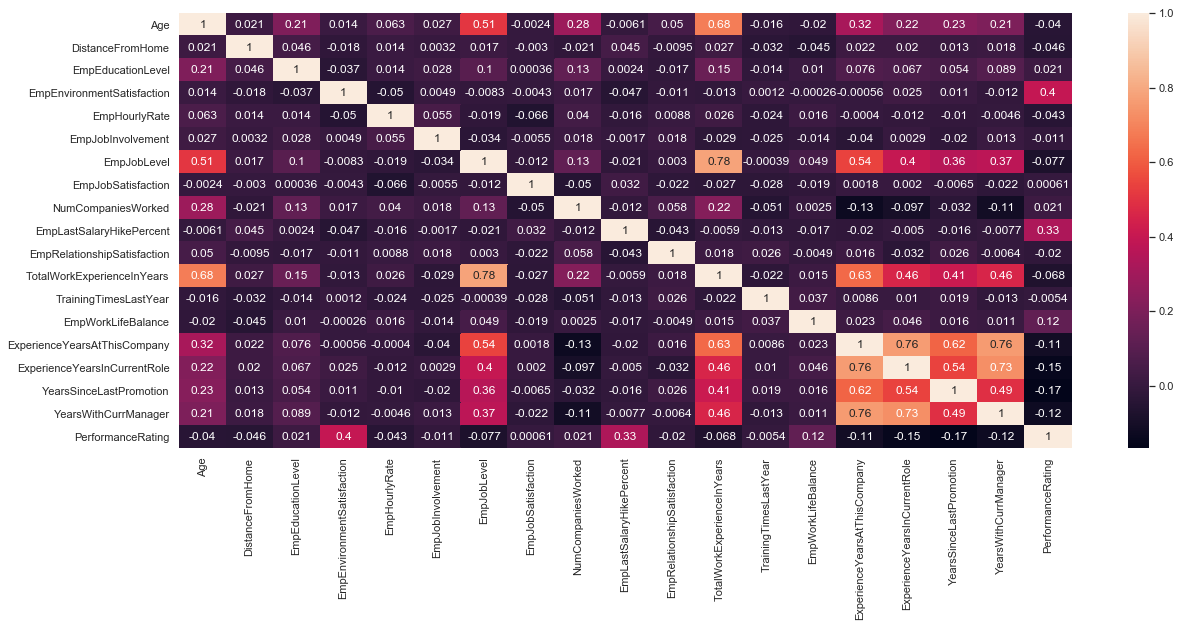

In [76]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True)

## Checking all the categorical data

In [77]:
data.select_dtypes('object').describe()

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E100937,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [78]:
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [79]:
data.groupby('PerformanceRating')['EmpDepartment'].value_counts()

PerformanceRating  EmpDepartment         
2                  Sales                      87
                   Research & Development     68
                   Finance                    15
                   Development                13
                   Human Resources            10
                   Data Science                1
3                  Development               304
                   Sales                     251
                   Research & Development    234
                   Human Resources            38
                   Finance                    30
                   Data Science               17
4                  Development                44
                   Research & Development     41
                   Sales                      35
                   Human Resources             6
                   Finance                     4
                   Data Science                2
Name: EmpDepartment, dtype: int64

In [80]:
dept_rating_data = data.groupby('EmpDepartment')['PerformanceRating'].value_counts()

In [81]:
dept_rating_data = dept_rating_data.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

In [82]:
dept_rating_data = dept_rating_data.reindex([2,3,4], level=1)

Text(0.5, 1.0, 'Performance Rating-vs-Department Name')

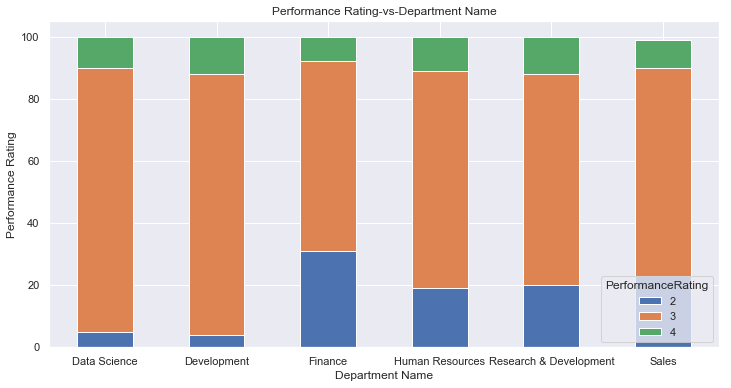

In [83]:
sns.set(rc={'figure.figsize':(12, 6)})
dept_rating_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Department Name')
plt.xticks(rotation=0)
plt.ylabel('Performance Rating')
plt.title('Performance Rating-vs-Department Name')

In [84]:
data.groupby('PerformanceRating')['EmpDepartment'].value_counts()

PerformanceRating  EmpDepartment         
2                  Sales                      87
                   Research & Development     68
                   Finance                    15
                   Development                13
                   Human Resources            10
                   Data Science                1
3                  Development               304
                   Sales                     251
                   Research & Development    234
                   Human Resources            38
                   Finance                    30
                   Data Science               17
4                  Development                44
                   Research & Development     41
                   Sales                      35
                   Human Resources             6
                   Finance                     4
                   Data Science                2
Name: EmpDepartment, dtype: int64

In [85]:
dept_rating_data = data.groupby('PerformanceRating')['EmpDepartment'].value_counts()

In [86]:
dept_rating_data

PerformanceRating  EmpDepartment         
2                  Sales                      87
                   Research & Development     68
                   Finance                    15
                   Development                13
                   Human Resources            10
                   Data Science                1
3                  Development               304
                   Sales                     251
                   Research & Development    234
                   Human Resources            38
                   Finance                    30
                   Data Science               17
4                  Development                44
                   Research & Development     41
                   Sales                      35
                   Human Resources             6
                   Finance                     4
                   Data Science                2
Name: EmpDepartment, dtype: int64

In [87]:
dept_rating_data = dept_rating_data.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

Text(0.5, 1.0, 'Performance Rating-vs-Department Name')

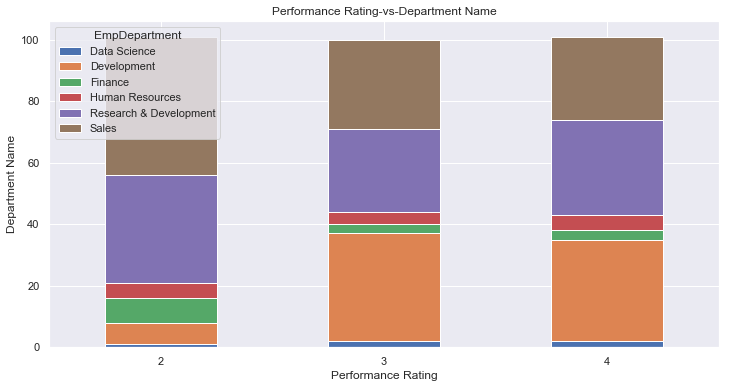

In [88]:
sns.set(rc={'figure.figsize':(12, 6)})
dept_rating_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Performance Rating')
plt.xticks(rotation=0)
plt.ylabel('Department Name')
plt.title('Performance Rating-vs-Department Name')

## Applying Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt_model = DecisionTreeClassifier()

In [91]:
training_data = data.copy()

In [92]:
training_data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [93]:
training_data.drop('PerformanceRating', axis=1, inplace=True)

In [94]:
columns = training_data.select_dtypes(include=['int64', 'float64']).columns

In [95]:
training_data = training_data[columns]

In [96]:
output_data = data['PerformanceRating'].copy()

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

In [99]:
dt_model.fit(X, Y)

DecisionTreeClassifier()

In [100]:
predictions = dt_model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
print(confusion_matrix)

<function confusion_matrix at 0x000001D57CC48048>


In [103]:
accuracy_score(predictions, y_test)

0.8611111111111112

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
score = cross_val_score(dt_model, X, Y, cv=10)

In [106]:
score

array([0.92857143, 0.8452381 , 0.86904762, 0.88095238, 0.82142857,
       0.82142857, 0.83333333, 0.85714286, 0.83333333, 0.85714286])

In [107]:
score.mean()

0.8547619047619047

### Visualize the decision tree

In [108]:
from sklearn.tree import export_graphviz
from six import StringIO  
import pydotplus
from IPython.display import Image

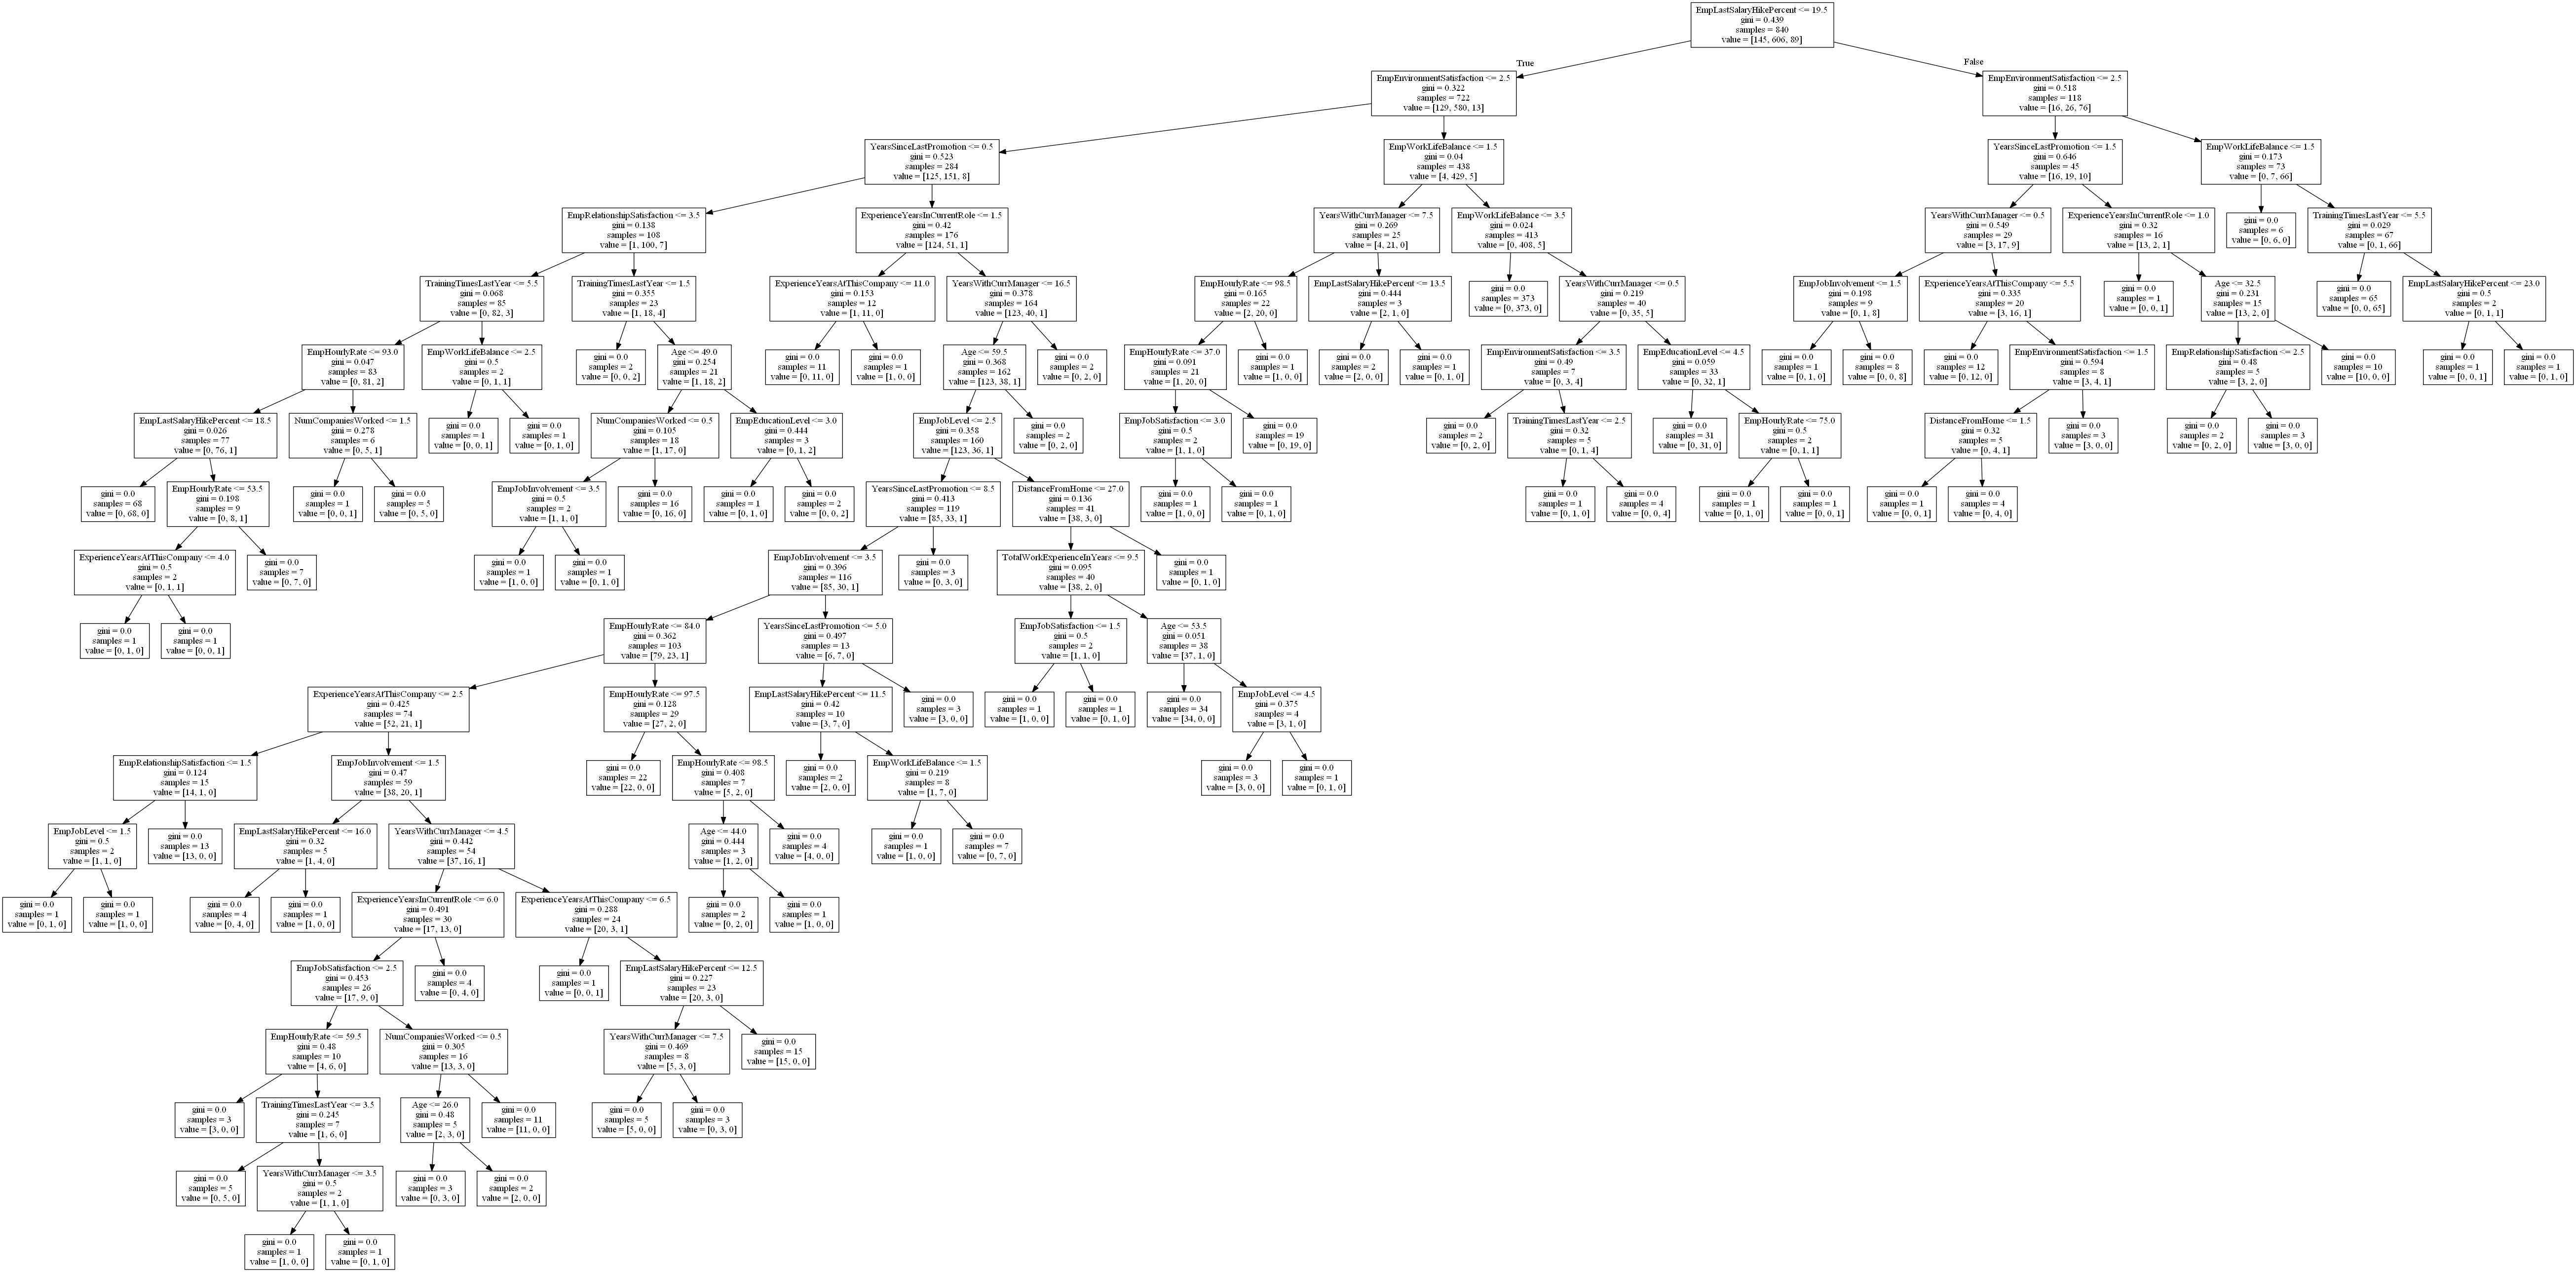

In [109]:
dot_data = StringIO()  
export_graphviz(dt_model, out_file=dot_data, 
                feature_names = training_data.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Hiring-Decision.png")
Image(graph.create_png())  